In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
%matplotlib inline
sns.set(style="ticks")

In [39]:
original_data = pd.read_csv('data.csv')
data = original_data.drop_duplicates()

In [40]:
data.shape

(1000, 11)

In [41]:
data.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type_school            1000 non-null   object 
 1   school_accreditation   1000 non-null   object 
 2   gender                 1000 non-null   object 
 3   interest               1000 non-null   object 
 4   residence              1000 non-null   object 
 5   parent_age             1000 non-null   int64  
 6   parent_salary          1000 non-null   int64  
 7   house_area             1000 non-null   float64
 8   average_grades         1000 non-null   float64
 9   parent_was_in_college  1000 non-null   bool   
 10  in_college             1000 non-null   bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 80.1+ KB


In [43]:
oe = OrdinalEncoder()

data[['type_school', 'school_accreditation', 'gender', 'interest', 'residence', 'parent_was_in_college', 'in_college']] = oe.fit_transform(
    data[['type_school', 'school_accreditation', 'gender', 'interest', 'residence', 'parent_was_in_college', 'in_college']])

In [44]:
data.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,0.0,0.0,1.0,0.0,1.0,56,6950000,83.0,84.09,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,57,4410000,76.8,86.91,0.0,1.0
2,0.0,1.0,0.0,4.0,1.0,50,6500000,80.6,87.43,0.0,1.0
3,1.0,1.0,1.0,4.0,0.0,49,6600000,78.2,82.12,1.0,1.0
4,0.0,0.0,0.0,4.0,1.0,57,5250000,75.1,86.79,0.0,0.0


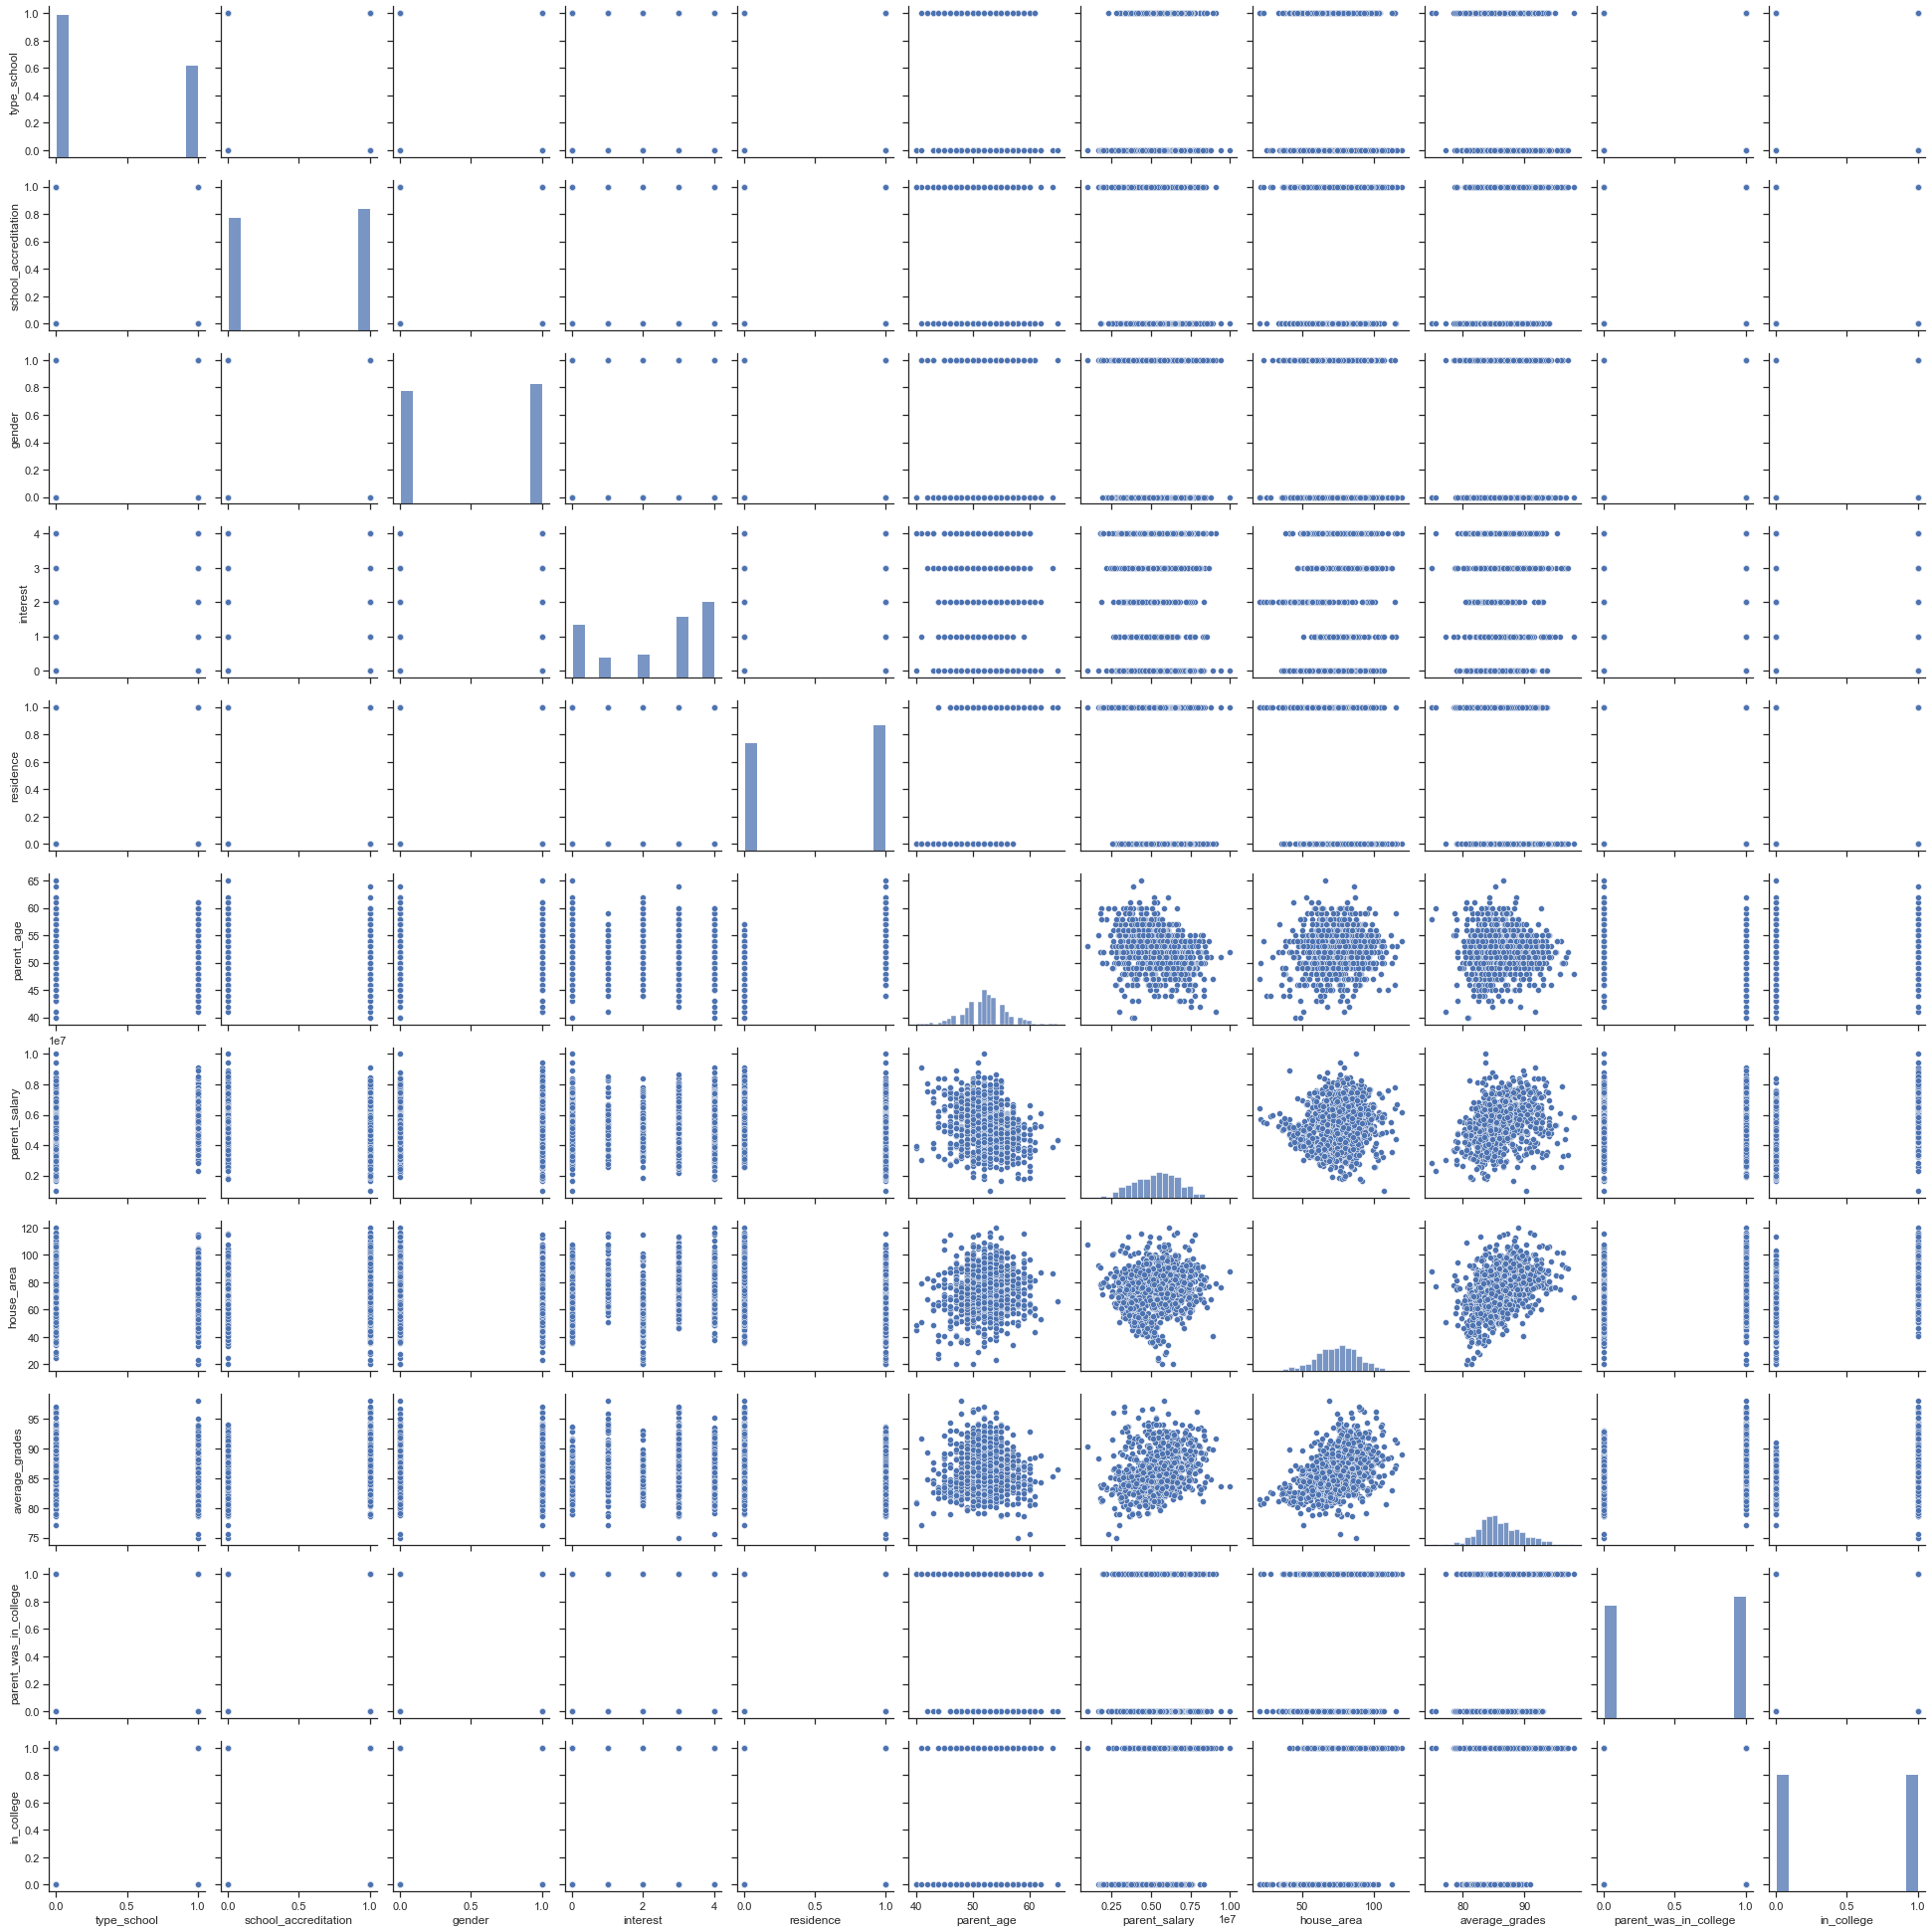

In [45]:
sns.pairplot(data)

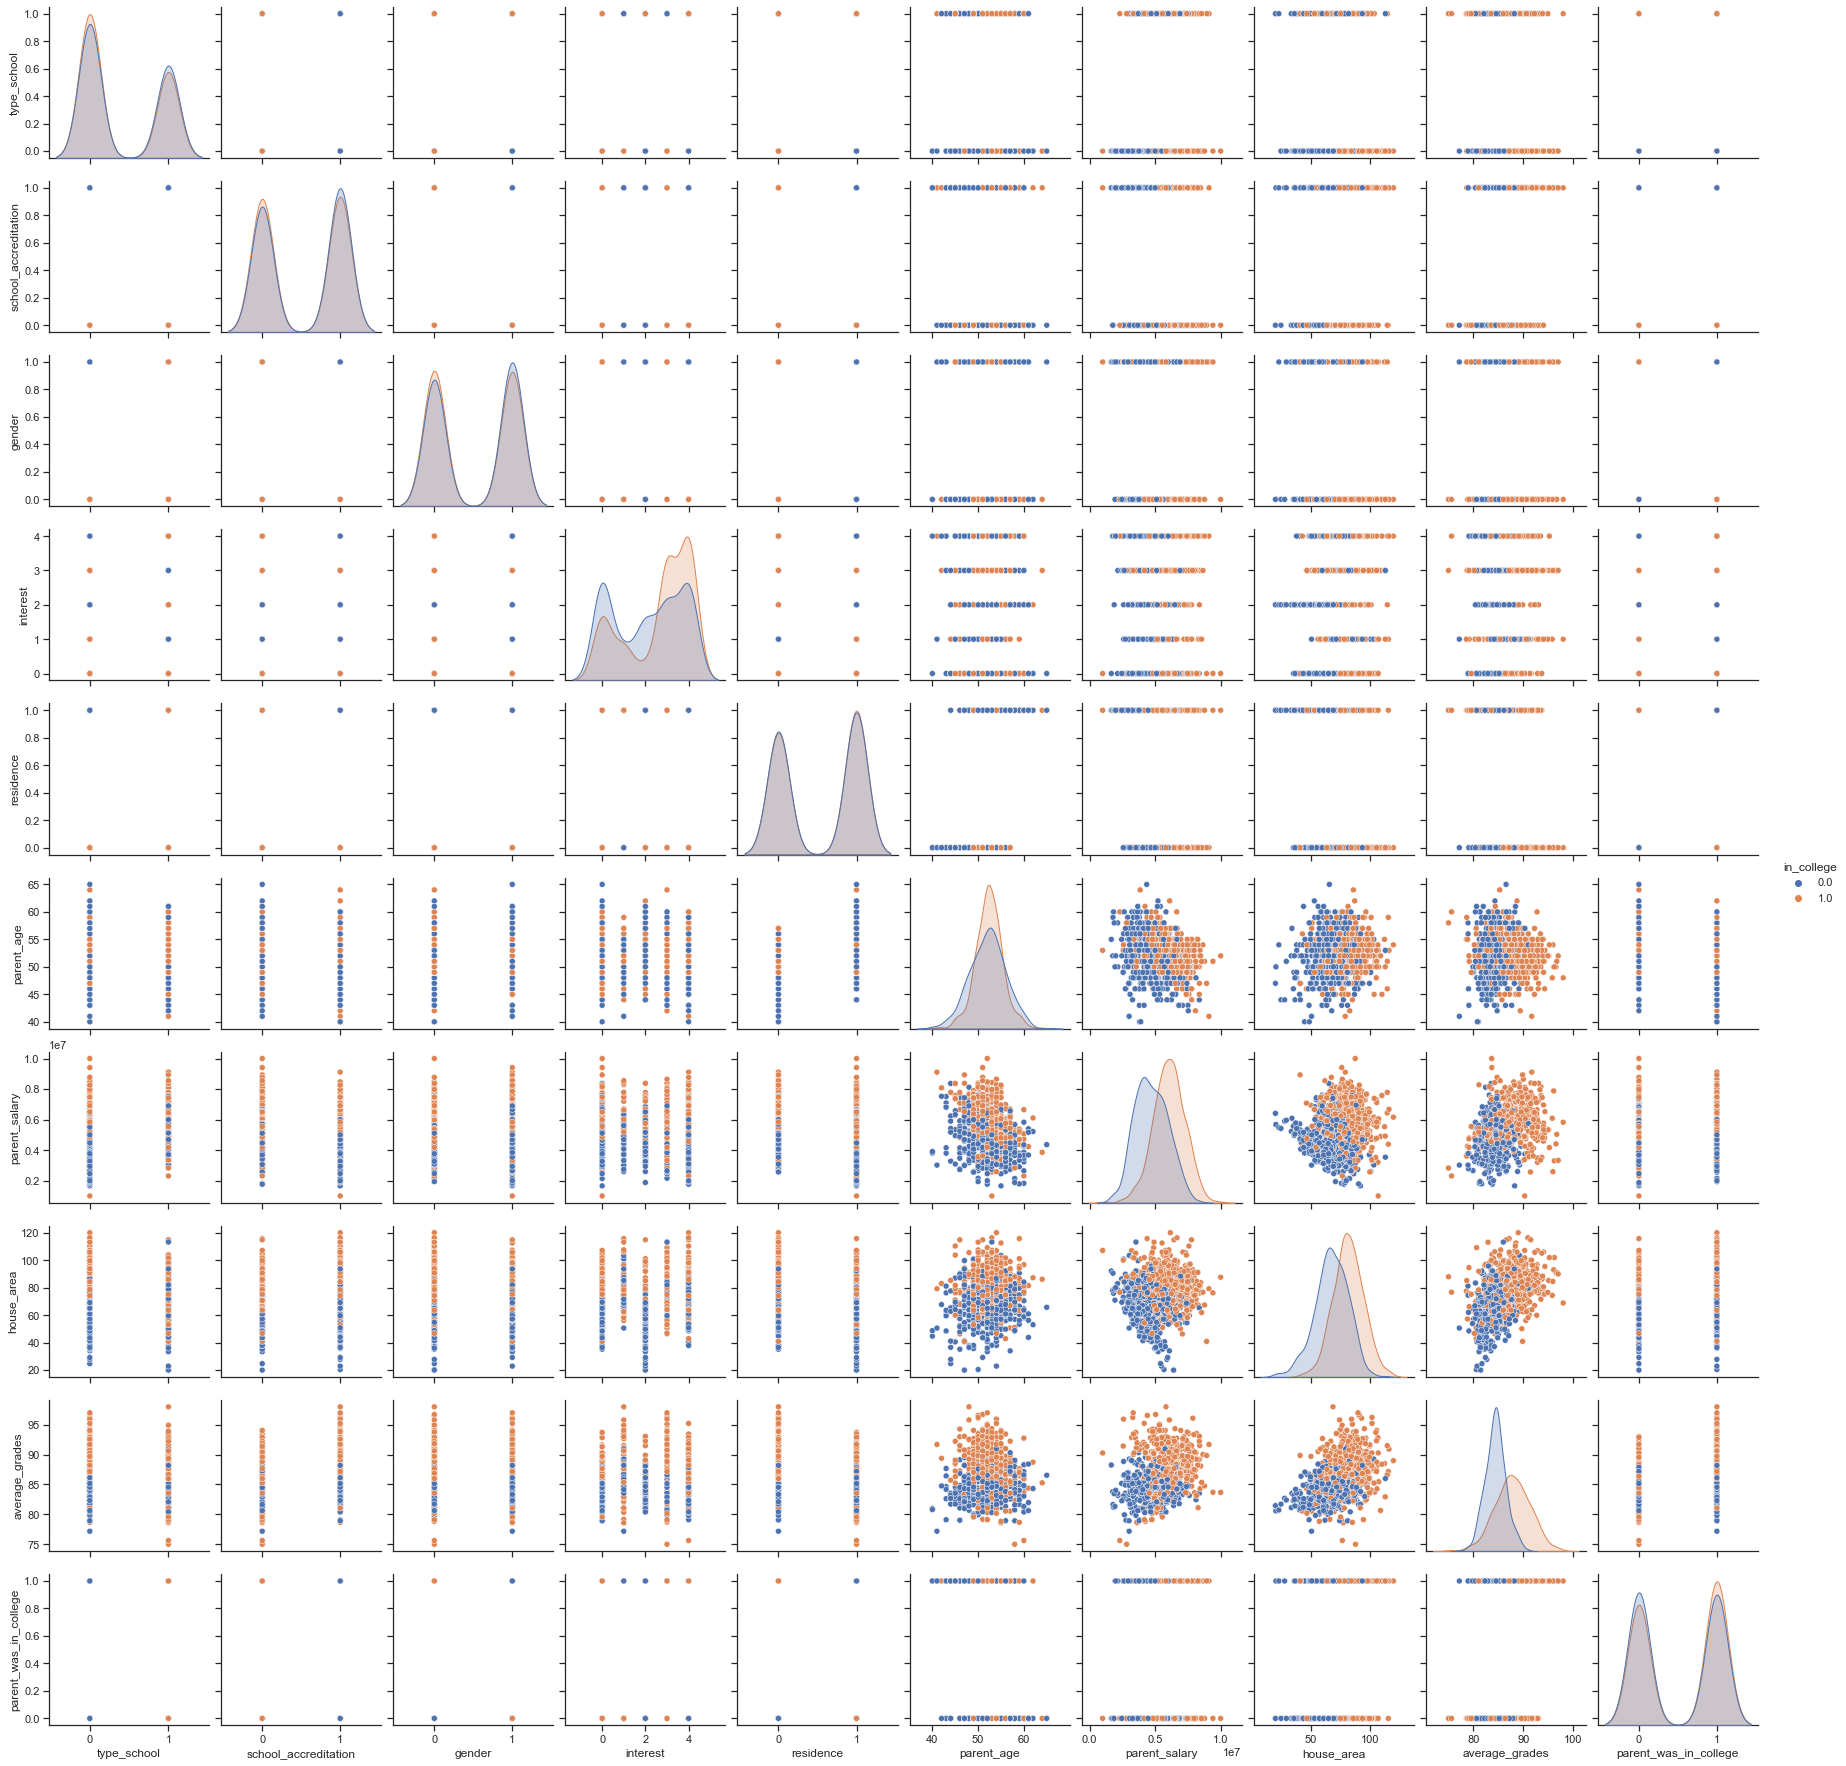

In [46]:
sns.pairplot(data, hue="in_college")

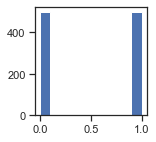

In [47]:
fig, ax = plt.subplots(figsize=(2,2))
plt.hist(data['in_college'])
plt.show()

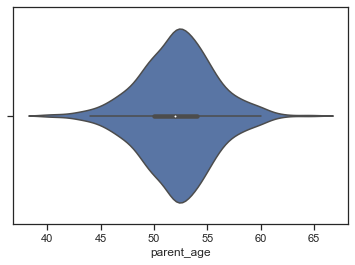

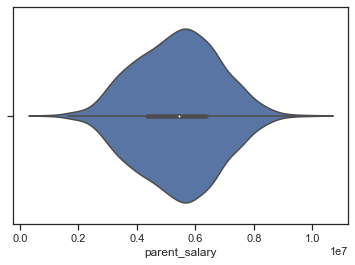

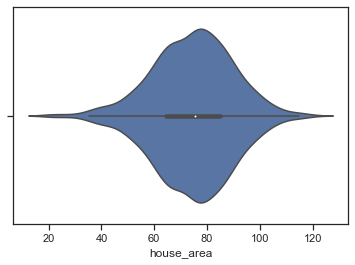

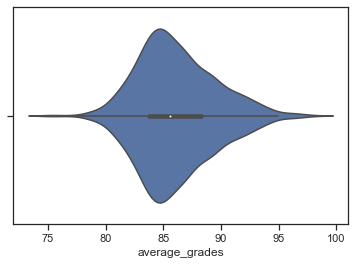

In [48]:
for col in ['parent_age', 'parent_salary', 'house_area', 'average_grades']:
    sns.violinplot(x=data[col])
    plt.show()

In [49]:
scale_cols = ['parent_age', 'parent_salary', 'house_area', 'average_grades', 'interest']

data_unscaled = data.copy()

sc1 = MinMaxScaler()
data[scale_cols] = sc1.fit_transform(data[scale_cols])

data.describe()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000
mean,0.391000,0.519000,0.515000,0.591250,0.539000,0.488320,0.486841,0.545153,0.482487,0.52000,0.50000
std,0.488219,0.499889,0.500025,0.389567,0.498726,0.140017,0.155283,0.152933,0.146902,0.49985,0.50025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,0.000000,0.000000,0.000000,0.250000,0.000000,0.400000,0.373333,0.446000,0.379891,0.00000,0.00000
50%,0.000000,1.000000,1.000000,0.750000,1.000000,0.480000,0.493333,0.555000,0.459783,1.00000,0.50000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.560000,0.598056,0.648250,0.576630,1.00000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000


In [50]:
data_unscaled.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,0.0,0.0,1.0,0.0,1.0,56,6950000,83.0,84.09,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,57,4410000,76.8,86.91,0.0,1.0
2,0.0,1.0,0.0,4.0,1.0,50,6500000,80.6,87.43,0.0,1.0
3,1.0,1.0,1.0,4.0,0.0,49,6600000,78.2,82.12,1.0,1.0
4,0.0,0.0,0.0,4.0,1.0,57,5250000,75.1,86.79,0.0,0.0


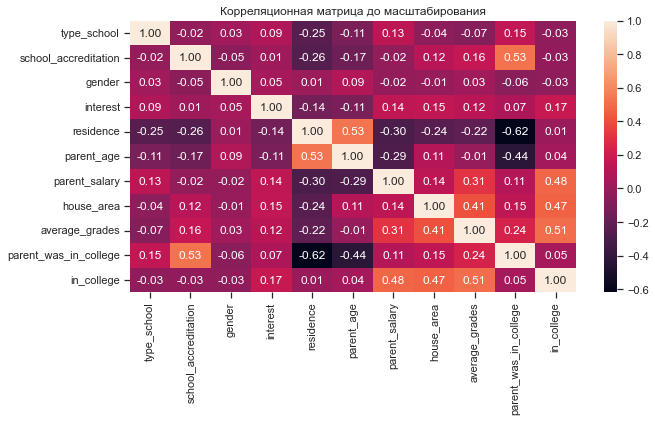

In [51]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data_unscaled.corr(), annot=True, fmt='.2f')
ax.set_title('Корреляционная матрица до масштабирования')
plt.show()

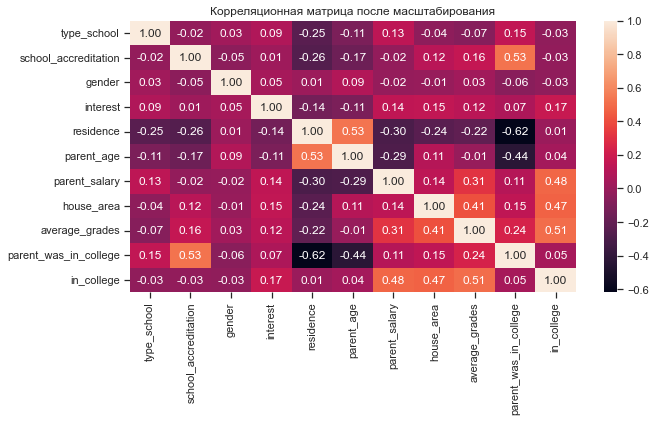

In [52]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
ax.set_title('Корреляционная матрица после масштабирования')
plt.show()

In [81]:
class MetricLogger:

    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values

    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5,
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()

In [82]:
x = data.drop(columns=['in_college'])
y = data['in_college']
x_train: pd.DataFrame
x_test: pd.DataFrame
y_train: pd.Series
y_test: pd.Series

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [113]:
clas_models = {'LogR': LogisticRegression(),
               'KNN':KNeighborsClassifier(),
               'SVC':SVC(probability=True),
               'SVC_Poly':SVC(kernel='poly', probability=True),
               'Tree':DecisionTreeClassifier(),
               'RF':RandomForestClassifier(),
               'GB':GradientBoostingClassifier()}

In [114]:
clasMetricLogger = MetricLogger()

In [115]:
def draw_roc_curve(y_true, y_score, ax, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score,
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    #plt.figure()
    lw = 2
    ax.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_xlim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")

In [116]:
def clas_train_model(model_name, model, clasMetricLogger):
    model.fit(x_train, y_train)
    # Предсказание значений
    y_pred = model.predict(x_test)
    # Предсказание вероятности класса "1" для roc auc
    y_pred_proba_temp = model.predict_proba(x_test)
    y_pred_proba = y_pred_proba_temp[:,1]

    precision = precision_score(y_test.values, y_pred)
    recall = recall_score(y_test.values, y_pred)
    f1 = f1_score(y_test.values, y_pred)
    roc_auc = roc_auc_score(y_test.values, y_pred_proba)

    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('f1', model_name, f1)
    clasMetricLogger.add('roc_auc', model_name, roc_auc)

    fig, ax = plt.subplots(ncols=2, figsize=(10,5))
    draw_roc_curve(y_test.values, y_pred_proba, ax[0])
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax[1], display_labels=['0','1'], cmap=plt.cm.Blues, normalize='true')
    fig.suptitle(model_name)
    plt.show()

C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_

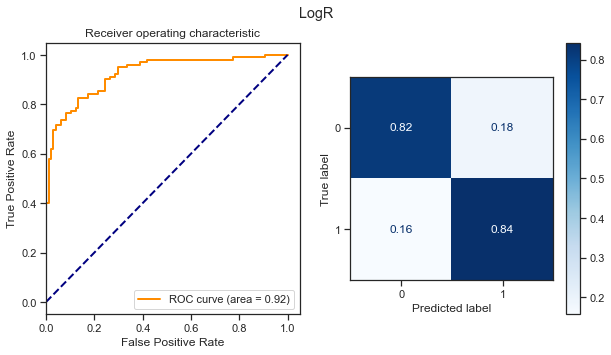

C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_

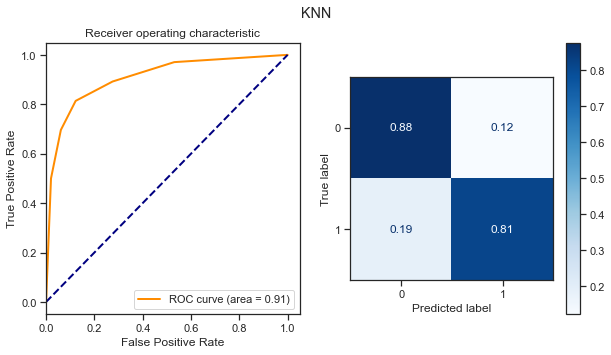

C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_

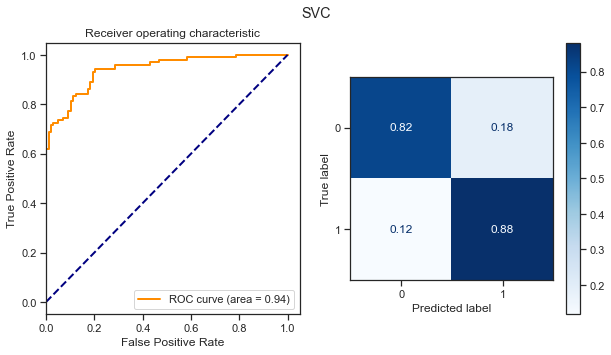

C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_

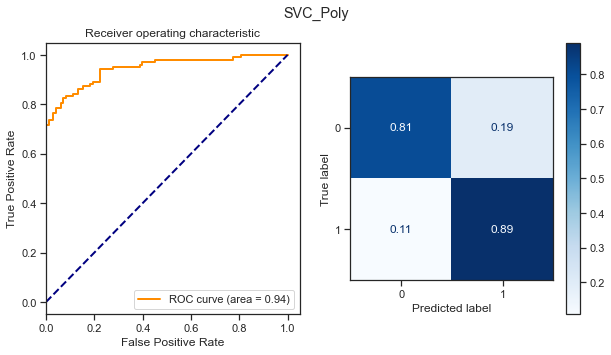

C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_

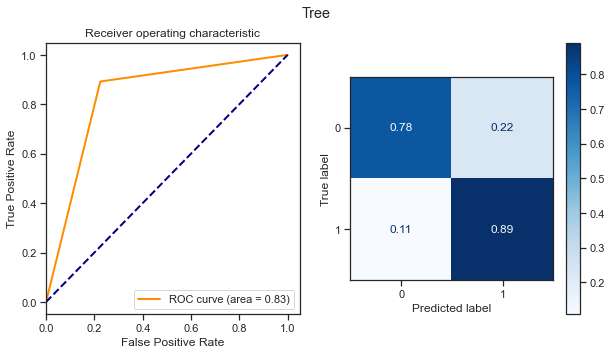

C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_

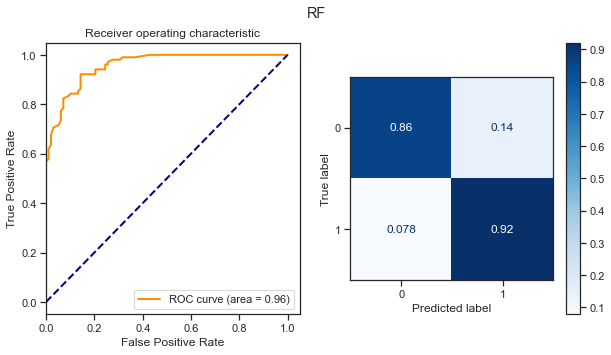

C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_

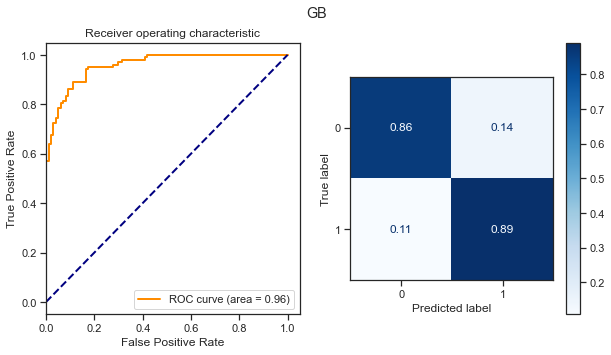

In [117]:
for model_name, model in clas_models.items():
    clas_train_model(model_name, model, clasMetricLogger)

In [118]:
n_range_list = list(range(0,10,1))
n_range_list[0] = 1

n_range = np.array(n_range_list)
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([1, 1, 2, 3, 4, 5, 6, 7, 8, 9])}]

In [119]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='roc_auc')
clf_gs.fit(x_train, y_train)

CPU times: total: 266 ms
Wall time: 270 ms


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([1, 1, 2, 3, 4, 5, 6, 7, 8, 9])}],
             scoring='roc_auc')

In [120]:
clf_gs.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [121]:
clf_gs.best_params_

{'n_neighbors': 3}

In [122]:
clf_gs_best_params_txt = str(clf_gs.best_params_['n_neighbors'])
clf_gs_best_params_txt

'3'

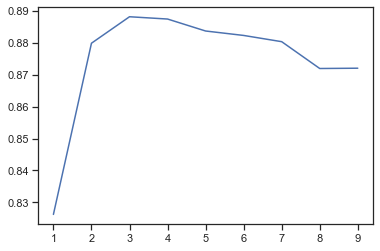

In [123]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [124]:
clas_models_grid = {'KNN_5':KNeighborsClassifier(n_neighbors=5),
                    str('KNN_' + clf_gs_best_params_txt):clf_gs.best_estimator_}

C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_

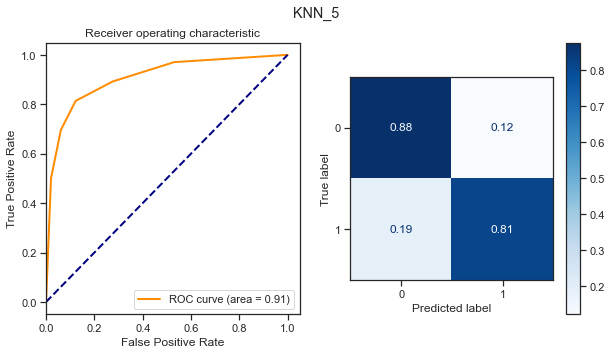

C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Tolya\AppData\Local\Temp\ipykernel_41928\1894375933.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_

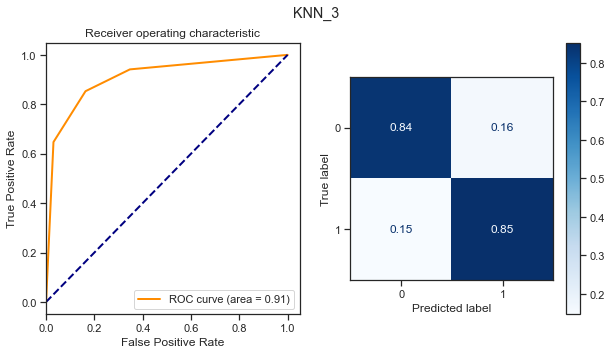

In [125]:
for model_name, model in clas_models_grid.items():
    clas_train_model(model_name, model, clasMetricLogger)

In [132]:
svc_parameters_to_tune = {'nu' : [0.1, 0.5, 1.0],
                      'C': [10.0, 100.0, 1000.0, 1e+4],
                      'degree' : [3, 4, 5]}

nusvr_poly_gs = GridSearchCV(NuSVR(kernel='poly'), svc_parameters_to_tune, cv=5, scoring='roc_auc')
nusvr_poly_gs.fit(x_train, y_train)

KeyboardInterrupt: 

In [ ]:
nusvr_poly_gs.best_params_

In [126]:
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['precision', 'recall', 'f1', 'roc_auc'], dtype=object)

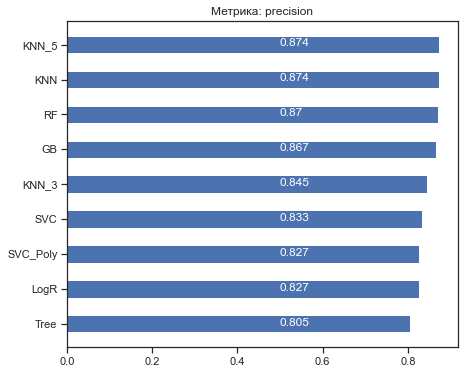

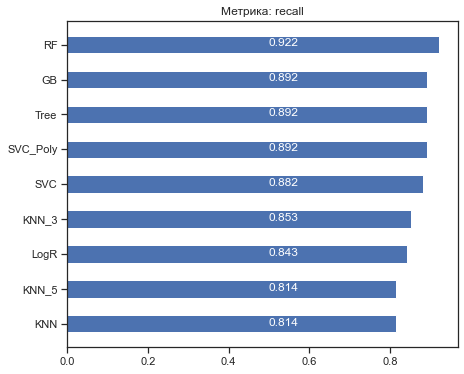

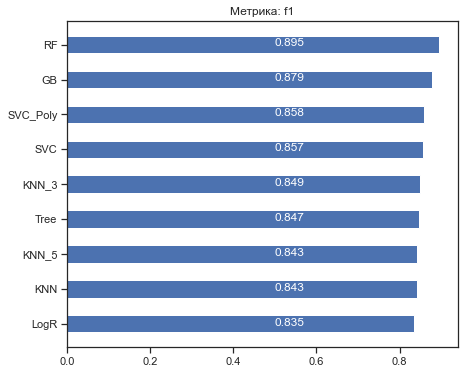

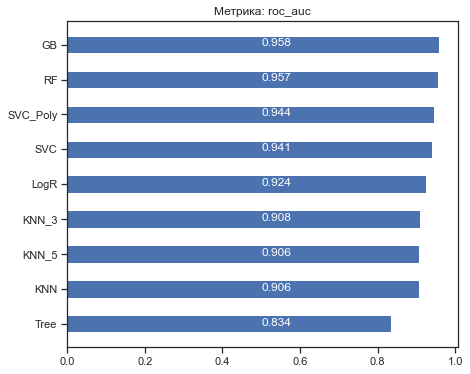

In [127]:
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))